In [219]:
from dotenv import load_dotenv
load_dotenv()

import os

import pandas as pd

# Inegi

In [128]:
def prepareInegi():
    inegi = pd.read_csv('inegi.csv')
    inegi.drop(columns=['nom_estab', 'per_ocu', 'fecha_alta', 'nom_processed', 'tipoUniEco', 'localidad'], inplace=True)
    return inegi

In [129]:
inegi = prepareInegi()
inegi.entidad.value_counts()

VERACRUZ DE IGNACIO DE LA LLAVE             48459
YUCATAN                                     17180
SAN LUIS POTOSÍ                             15655
TAMAULIPAS                                  15576
SINALOA                                     15321
SONORA                                      13198
QUERÉTARO                                   12448
TABASCO                                     11959
QUINTANA ROO                                11275
ZACATECAS                                    8474
TLAXCALA                                     8267
Name: entidad, dtype: int64

In [130]:
def getInegiByState(state):
    return inegi[inegi['entidad']==state]

In [131]:
sinegi = getInegiByState('TAMAULIPAS')
sinegi.head()

,entidad,municipio,latitud,longitud,tipo,Cocina Económica,Antojitos,Pizza,Hamburguesas,Hot Dogs,...,Yucateca,Tabasqueña,Arrachera,Pastor,Birria,Barbacoa,Carnero,Pozole,Enchiladas,Chilaquiles
79856,TAMAULIPAS,Matamoros,25.869956,-97.514709,"['burg', 'burgu', 'hamburgues']",0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
79857,TAMAULIPAS,Altamira,22.391528,-97.930704,[],0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79858,TAMAULIPAS,Valle Hermoso,25.670395,-97.815718,[],0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79859,TAMAULIPAS,Victoria,23.729669,-99.152546,[],0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79860,TAMAULIPAS,Altamira,22.334950,-97.865727,['restaur'],0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [132]:
sinegi['municipio'].value_counts()

Matamoros       2384
Tampico         2161
Reynosa         1972
Nuevo Laredo    1757
Victoria        1550
                ... 
Bustamante         5
Mainero            5
Cruillas           3
Méndez             2
Casas              1
Name: municipio, Length: 42, dtype: int64

In [133]:
def inegiFilterByMunicipio(municipio, df):
    return df.drop(df[df['municipio']!=municipio].index)#, inplace=True)

In [138]:
sinegi = inegiFilterByMunicipio('Tampico', sinegi)

In [137]:
sinegi.head()

,entidad,municipio,latitud,longitud,tipo,Cocina Económica,Antojitos,Pizza,Hamburguesas,Hot Dogs,...,Yucateca,Tabasqueña,Arrachera,Pastor,Birria,Barbacoa,Carnero,Pozole,Enchiladas,Chilaquiles
79866,TAMAULIPAS,Tampico,22.273236,-97.874833,[],0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79867,TAMAULIPAS,Tampico,22.255264,-97.861039,['com'],1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79868,TAMAULIPAS,Tampico,22.262607,-97.859094,['com'],1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79874,TAMAULIPAS,Tampico,22.213607,-97.849838,[],0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79885,TAMAULIPAS,Tampico,22.302357,-97.860012,[],0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
foods = ['Cocina Económica', 'Antojitos', 'Pizza', 'Hamburguesas', 'Hot Dogs', 'Sushi', 'Tamales', 'Mariscos', 
         'Pescado', 'Tacos', 'Carne', 'Asada', 'Panuchos', 'Cochinita', 'Pollo', 'Desayunos', 'Tortas', 'Mondongo', 
         'Menudo', 'Memelas', 'Empanadas', 'Chicharrón', 'Gorditas', 'Costillas', 'Carnitas', 'Doraditas', 
         'Baguettes', 'Parrilla', 'Huaraches', 'Rosticería', 'China', 'Yucateca', 'Tabasqueña', 'Arrachera', 
         'Pastor', 'Birria', 'Barbacoa', 'Carnero', 'Pozole', 'Enchiladas', 'Chilaquiles']

In [144]:
def getInegiResults(df):
    results = {}

    for food in foods:
        results[food] = df[food].sum()

    return results

In [145]:
inegi_results = getInegiResults(sinegi)
inegi_results

{'Cocina Económica': 185,
 'Antojitos': 156,
 'Pizza': 31,
 'Hamburguesas': 31,
 'Hot Dogs': 23,
 'Sushi': 2,
 'Tamales': 39,
 'Mariscos': 45,
 'Pescado': 11,
 'Tacos': 344,
 'Carne': 0,
 'Asada': 69,
 'Panuchos': 0,
 'Cochinita': 9,
 'Pollo': 113,
 'Desayunos': 2,
 'Tortas': 252,
 'Mondongo': 1,
 'Menudo': 0,
 'Memelas': 0,
 'Empanadas': 9,
 'Chicharrón': 1,
 'Gorditas': 111,
 'Costillas': 1,
 'Carnitas': 38,
 'Doraditas': 0,
 'Baguettes': 5,
 'Parrilla': 11,
 'Huaraches': 1,
 'Rosticería': 5,
 'China': 0,
 'Yucateca': 3,
 'Tabasqueña': 0,
 'Arrachera': 2,
 'Pastor': 10,
 'Birria': 0,
 'Barbacoa': 26,
 'Carnero': 0,
 'Pozole': 0,
 'Enchiladas': 1,
 'Chilaquiles': 1}

In [146]:
def getInegiDfResult(inegi_results):
    return pd.DataFrame(inegi_results.items(), columns = ['Index', 'InegiCount']).set_index('Index')

In [147]:
df = getInegiDfResult(inegi_results)
df.head()

,InegiCount
Index,
Cocina Económica,185
Antojitos,156
Pizza,31
Hamburguesas,31
Hot Dogs,23


# User Location - GeoPy API

In [148]:
from geopy.geocoders import Nominatim
#user_input = input('Introduce lugar:')

def userLocationGeocoding(string):
    geolocator = Nominatim(user_agent="food-business-recommender")
    return geolocator.geocode(string)

In [154]:
location = userLocationGeocoding('unidad modelo tampico tamaulipas')
location.latitude

22.2853942

# Google Trends

### Revisaremos qué tantas búsquedas se hacen en Google sobre cada uno de los giros de comida, con el fin de conocer dónde está el interés del consumidor.
### Para esto utilizaremos la API de Google Trends a través de pytrends.

In [10]:
from pytrends.request import TrendReq

In [155]:
def getGoogleTrends(foods, df):
    pytrends = TrendReq(hl='es-MX', tz=360)
    
    resultados = []
    for comida in foods:
        print(comida)
        pytrends.build_payload([comida], cat=71, geo='MX', gprop='')
        resultados.append(pytrends.interest_by_region(resolution='REGION', inc_low_vol=True, inc_geo_code=False))
    return resultados

In [156]:
google_trends = getGoogleTrends(foods, sinegi)
google_trends

Cocina Económica
Antojitos
Pizza
Hamburguesas
Hot Dogs
Sushi
Tamales
Mariscos
Pescado
Tacos
Carne
Asada
Panuchos
Cochinita
Pollo
Desayunos
Tortas
Mondongo
Menudo
Memelas
Empanadas
Chicharrón
Gorditas
Costillas
Carnitas
Doraditas
Baguettes
Parrilla
Huaraches
Rosticería
China
Yucateca
Tabasqueña
Arrachera
Pastor
Birria
Barbacoa
Carnero
Pozole
Enchiladas
Chilaquiles


[                     Cocina Económica
 geoName                              
 Aguascalientes                      0
 Baja California                     0
 Baja California Sur                 0
 Campeche                            0
 Chiapas                             0
 ...                               ...
 Tamaulipas                          0
 Tlaxcala                            0
 Veracruz                            0
 Yucatán                           100
 Zacatecas                           0
 
 [32 rows x 1 columns],                      Antojitos
 geoName                       
 Aguascalientes              15
 Baja California             23
 Baja California Sur         23
 Campeche                   100
 Chiapas                     37
 ...                        ...
 Tamaulipas                  28
 Tlaxcala                    23
 Veracruz                    63
 Yucatán                     40
 Zacatecas                   37
 
 [32 rows x 1 columns],                      Pizza

### Como los resultados nos los da por estados, filtramos y nos quedamos con las búsquedas en Yucatán.

In [158]:
def getTrends(google_trends, state):
    requests = google_trends[0].join(resultados[1:]).T
    return requests['Yucatán'].sort_values(ascending=False)

In [159]:
trends =  getTrends(google_trends, 'Tampico')
trends

Cocina Económica    100
Parrilla            100
Pizza               100
Carnero             100
Panuchos            100
                   ... 
Gorditas             18
Birria               16
Menudo               13
Tabasqueña           12
Rosticería            0
Name: Yucatán, Length: 41, dtype: int64

In [160]:
df['GoogleTrend'] = trends
df

,InegiCount,GoogleTrend
Index,,
Cocina Económica,185,100
Antojitos,156,33
Pizza,31,100
Hamburguesas,31,53
Hot Dogs,23,28
...,...,...
Barbacoa,26,31
Carnero,0,100
Pozole,0,25


## Interest over time

In [161]:
def getGoogloIOT(foods):
    iot = {}
    for comida in foods:
        print(comida)
        pytrends.build_payload([comida], cat=71, geo='MX', gprop='')
        iot[comida] = pytrends.interest_over_time()
        
    return iot

In [162]:
iot = getGoogloIOT(foods)
iot

Cocina Económica
Antojitos
Pizza
Hamburguesas
Hot Dogs
Sushi
Tamales
Mariscos
Pescado
Tacos
Carne
Asada
Panuchos
Cochinita
Pollo
Desayunos
Tortas
Mondongo
Menudo
Memelas
Empanadas
Chicharrón
Gorditas
Costillas
Carnitas
Doraditas
Baguettes
Parrilla
Huaraches
Rosticería
China
Yucateca
Tabasqueña
Arrachera
Pastor
Birria
Barbacoa
Carnero
Pozole
Enchiladas
Chilaquiles


{'Cocina Económica':             Cocina Económica isPartial
 date                                  
 2015-03-08                 0     False
 2015-03-15                38     False
 2015-03-22                42     False
 2015-03-29                46     False
 2015-04-05                 0     False
 ...                      ...       ...
 2020-02-02                28     False
 2020-02-09                54     False
 2020-02-16                26     False
 2020-02-23                 0     False
 2020-03-01                 0      True
 
 [261 rows x 2 columns], 'Antojitos':             Antojitos isPartial
 date                           
 2015-03-08         21     False
 2015-03-15         15     False
 2015-03-22         22     False
 2015-03-29         10     False
 2015-04-05         21     False
 ...               ...       ...
 2020-02-02         38     False
 2020-02-09         31     False
 2020-02-16         28     False
 2020-02-23         34     False
 2020-03-01         62   

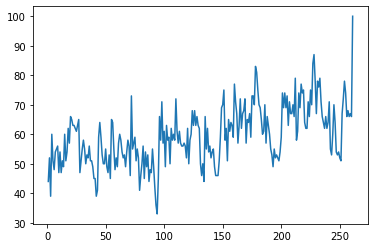

In [163]:
import matplotlib.pyplot as plt

x = [i+1 for i in range(len(iot['Desayunos']['Desayunos']))]

#for food in foods:
plt.plot(x, iot['Desayunos']['Desayunos'].values);

In [164]:
iot['Gorditas']

,Gorditas,isPartial
date,,
2015-03-08,53,False
2015-03-15,47,False
2015-03-22,48,False
2015-03-29,43,False
2015-04-05,39,False
...,...,...
2020-02-02,75,False
2020-02-09,69,False
2020-02-16,63,False


In [165]:
import numpy as np
from sklearn.linear_model import LinearRegression

def getTrendSlope(foods, iot):
    x = [i+1 for i in range(len(iot['Desayunos']['Desayunos']))]
    linreg = LinearRegression()

    slope = {}
    for food in foods:
        linreg.fit(np.array(x).reshape(-1,1), iot[food][food].values)
        slope[food] = linreg.intercept_

    return slope

In [167]:
slope = getTrendSlope(foods, iot)
slope

{'Cocina Económica': 8.248953728264075,
 'Antojitos': 20.060978485116415,
 'Pizza': 39.63539640436192,
 'Hamburguesas': 10.142322428529322,
 'Hot Dogs': 42.780607132331276,
 'Sushi': 42.84450338933098,
 'Tamales': 13.442676097848514,
 'Mariscos': 21.055938697318005,
 'Pescado': 29.956793398172707,
 'Tacos': 36.653463012083705,
 'Carne': 38.80262304745064,
 'Asada': 11.219540229885059,
 'Panuchos': 22.004538756262896,
 'Cochinita': 45.51600353669319,
 'Pollo': 57.09619805481874,
 'Desayunos': 49.985735337459474,
 'Tortas': 51.29313292071913,
 'Mondongo': 13.511111111111111,
 'Menudo': 13.434777483053347,
 'Memelas': 28.398084291187743,
 'Empanadas': 20.598437960506924,
 'Chicharrón': 2.4359269083407007,
 'Gorditas': 45.40680813439434,
 'Costillas': 15.673946360153256,
 'Carnitas': 28.57332743884468,
 'Doraditas': 14.10727969348659,
 'Baguettes': 32.80666077217801,
 'Parrilla': 29.49799587385794,
 'Huaraches': 26.634482758620695,
 'Rosticería': 4.099145299145299,
 'China': 20.53153551429

In [168]:
def addSlopeToDf(df):
    df['slope'] = ''
    for key in slope:
        df['slope'].loc[key] = slope[key]
    df.slope = df.slope.astype('float64')
    
    return df

In [170]:
df = addSlopeToDf(df)
df.dtypes

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


InegiCount       int64
GoogleTrend      int64
slope          float64
dtype: object

### Con esto, tenemos parametrizado el interés en el estado por cada uno de los giros de comida.
### Ahora, necesitamos revisar el grado de satisfacción de los usuarios por la oferta existente.

# Yelp

### Utilizando la API de Yelp, hacemos búsquedas nuevamente sobre los diferentes giros de comida para encontrar negocios y sus calificaciónes en la plataforma.

In [220]:
import requests
from bs4 import BeautifulSoup as bs
import json

In [223]:
def searchYelp(foods, location):
    api_key = os.getenv("YELP_API_KEY")
    endpoint = 'https://api.yelp.com/v3/businesses/search?'
    
    yelp_search = []
    for comida in foods:
        term = 'term={}&'.format(comida)
        print(term)
        latitude = 'latitude='+str(location.latitude)+'&'
        longitude = 'longitude='+str(location.longitude)+'&'
        locale = 'locale=es_MX&'
        radius = 'radius=3000&'
        limit = 'limit=50' 
        res = requests.get(endpoint+term+latitude+longitude+locale+radius+limit, headers={'Authorization':'Bearer '+api_key})
        soup = bs(res.content)
        yelp_json = json.loads(soup.findAll('p')[0].text)
        ydf = pd.DataFrame(yelp_json['businesses'])
        ydf['tipo'] = comida
        yelp_search.append(ydf)

    return yelp_search

In [224]:
yelp_search = searchYelp(foods, location)
yelp_search

term=Cocina Económica&
term=Antojitos&
term=Pizza&
term=Hamburguesas&
term=Hot Dogs&
term=Sushi&
term=Tamales&
term=Mariscos&
term=Pescado&
term=Tacos&
term=Carne&
term=Asada&
term=Panuchos&
term=Cochinita&
term=Pollo&
term=Desayunos&
term=Tortas&
term=Mondongo&
term=Menudo&
term=Memelas&
term=Empanadas&
term=Chicharrón&
term=Gorditas&
term=Costillas&
term=Carnitas&
term=Doraditas&
term=Baguettes&
term=Parrilla&
term=Huaraches&
term=Rosticería&
term=China&
term=Yucateca&
term=Tabasqueña&
term=Arrachera&
term=Pastor&
term=Birria&
term=Barbacoa&
term=Carnero&
term=Pozole&
term=Enchiladas&
term=Chilaquiles&


[Empty DataFrame
 Columns: [tipo]
 Index: [], Empty DataFrame
 Columns: [tipo]
 Index: [],                        id                    alias              name  \
 0  77jt2C-RMmBVn3d4YO3Ujg  chuck-e-cheeses-tampico  Chuck e Cheese's   
 
                                            image_url  is_closed  \
 0  https://s3-media3.fl.yelpcdn.com/bphoto/GLCEzI...      False   
 
                                                  url  review_count  \
 0  https://www.yelp.com.mx/biz/chuck-e-cheeses-ta...             1   
 
                                           categories  rating  \
 0  [{'alias': 'arcades', 'title': 'Sala de juegos...     4.0   
 
                                        coordinates transactions  \
 0  {'latitude': 22.27214, 'longitude': -97.873009}           []   
 
                                             location          phone  \
 0  {'address1': 'Av. Miguel Hidalgo S/N', 'addres...  +528338003030   
 
      display_phone     distance   tipo  
 0  01 833 800 3030  1

In [178]:
def getYelpDf(foods, yelp_search):
    lugares = pd.concat(yelp_search, axis=0, sort=False)
    lugares.reset_index(inplace=True)

    ratings = dict(lugares.tipo.value_counts())
    for comida in inegi_results:
        ratings[comida] = lugares[lugares.tipo == comida]['rating'].mean()

    yf = pd.concat(yelp_search)
    yf.drop(columns = ['alias', 'display_phone', 'location', 'id', 'image_url', 'is_closed', 'phone', 'transactions', 'url'], inplace=True)
    yf.reset_index(inplace=True)
    return yf

In [183]:
yf = getYelpDf(foods, yelp_search)
yf

/home/linuxbrew/.linuxbrew/Cellar/jupyterlab/1.2.4/libexec/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


,index,categories,coordinates,distance,name,price,rating,review_count,tipo
0,0,"[{'alias': 'arcades', 'title': 'Sala de juegos...","{'latitude': 22.27214, 'longitude': -97.873009}",1979.691511,Chuck e Cheese's,NaN,4.0,1.0,Pizza
1,0,"[{'alias': 'burgers', 'title': 'Hamburguesas'}...","{'latitude': 22.2638902126154, 'longitude': -9...",3413.126260,Marusha's,$,4.0,1.0,Hamburguesas
2,1,"[{'alias': 'burgers', 'title': 'Hamburguesas'}...","{'latitude': 22.2756886931187, 'longitude': -9...",1663.131592,McDonalds,$$,4.0,1.0,Hamburguesas
3,2,"[{'alias': 'tacos', 'title': 'Taquerías'}, {'a...","{'latitude': 22.273538, 'longitude': -97.87504...",1724.937372,7 Leguas,NaN,3.0,1.0,Hamburguesas
4,3,"[{'alias': 'burgers', 'title': 'Hamburguesas'}]","{'latitude': 22.2657831010059, 'longitude': -9...",3433.658618,Carl's Jr,NaN,3.0,1.0,Hamburguesas
...,...,...,...,...,...,...,...,...,...
17,0,"[{'alias': 'tacos', 'title': 'Taquerías'}]","{'latitude': 22.263058730937, 'longitude': -97...",3570.355393,La Palma,NaN,3.5,2.0,Tortas
18,0,"[{'alias': 'steak', 'title': 'Parrilla'}]","{'latitude': 22.2626292435619, 'longitude': -9...",3721.330388,El Asador,$$,4.5,10.0,Empanadas
19,0,"[{'alias': 'steak', 'title': 'Parrilla'}]","{'latitude': 22.2626292435619, 'longitude': -9...",3721.330388,El Asador,$$,4.5,10.0,Parrilla
20,1,"[{'alias': 'bars', 'title': 'Bares'}, {'alias'...","{'latitude': 22.2648321745431, 'longitude': -9...",2571.312031,360 Grill And Bar,$$,3.5,2.0,Parrilla


## Adding the mean rating per food to the main dataframe

In [184]:
df['YelpRating'] = yf.groupby('tipo').mean().rating
df

,InegiCount,GoogleTrend,slope,YelpRating
Index,,,,
Cocina Económica,185,100,8.248954,NaN
Antojitos,156,33,20.060978,NaN
Pizza,31,100,39.635396,4.0
Hamburguesas,31,53,10.142322,3.0
Hot Dogs,23,28,42.780607,NaN
...,...,...,...,...
Barbacoa,26,31,23.468317,NaN
Carnero,0,100,24.764574,NaN
Pozole,0,25,13.533039,NaN


# Score

In [185]:
def calculateScore(df):
    #df['score'] = df.GoogleTrend/100 - df.YelpRating/5 - df.InegiCount/df.InegiCount.max()
    #df['score'] = 0.05*df.GoogleTrend/df.YelpRating - df.InegiCount/df.InegiCount.max() + 0.5*df.slope/df.slope.max()
    df['score'] = df.GoogleTrend/100 + df.slope/df.slope.max() - df.YelpRating/5 - df.InegiCount/df.InegiCount.max()
    return df.sort_values(by='score', ascending=False).head()

In [187]:
df = calculateScore(df)
df

,InegiCount,GoogleTrend,slope,YelpRating,score
Index,,,,,
Carne,0,64,38.802623,3.375,0.870662
Parrilla,11,100,29.497996,4.000,0.533651
Sushi,2,30,42.844503,4.000,0.435484
Pizza,31,100,39.635396,4.000,0.125099
Hamburguesas,31,53,10.142322,3.000,-0.833276


## Yelp Locations Dataframe

In [190]:
from pandas.io.json import json_normalize

In [191]:
def flatLatLong(yf):
    yf[['latitude', 'longitude']] = json_normalize(yf.coordinates)
    return yf

In [192]:
yf = flatLatLong(yf)
yf

,index,categories,coordinates,distance,name,price,rating,review_count,tipo,latitude,longitude
0,0,"[{'alias': 'arcades', 'title': 'Sala de juegos...","{'latitude': 22.27214, 'longitude': -97.873009}",1979.691511,Chuck e Cheese's,NaN,4.0,1.0,Pizza,22.272140,-97.873009
1,0,"[{'alias': 'burgers', 'title': 'Hamburguesas'}...","{'latitude': 22.2638902126154, 'longitude': -9...",3413.126260,Marusha's,$,4.0,1.0,Hamburguesas,22.263890,-97.862185
2,1,"[{'alias': 'burgers', 'title': 'Hamburguesas'}...","{'latitude': 22.2756886931187, 'longitude': -9...",1663.131592,McDonalds,$$,4.0,1.0,Hamburguesas,22.275689,-97.873556
3,2,"[{'alias': 'tacos', 'title': 'Taquerías'}, {'a...","{'latitude': 22.273538, 'longitude': -97.87504...",1724.937372,7 Leguas,NaN,3.0,1.0,Hamburguesas,22.273538,-97.875044
4,3,"[{'alias': 'burgers', 'title': 'Hamburguesas'}]","{'latitude': 22.2657831010059, 'longitude': -9...",3433.658618,Carl's Jr,NaN,3.0,1.0,Hamburguesas,22.265783,-97.860078
...,...,...,...,...,...,...,...,...,...,...,...
17,0,"[{'alias': 'tacos', 'title': 'Taquerías'}]","{'latitude': 22.263058730937, 'longitude': -97...",3570.355393,La Palma,NaN,3.5,2.0,Tortas,22.263059,-97.860927
18,0,"[{'alias': 'steak', 'title': 'Parrilla'}]","{'latitude': 22.2626292435619, 'longitude': -9...",3721.330388,El Asador,$$,4.5,10.0,Empanadas,22.262629,-97.859346
19,0,"[{'alias': 'steak', 'title': 'Parrilla'}]","{'latitude': 22.2626292435619, 'longitude': -9...",3721.330388,El Asador,$$,4.5,10.0,Parrilla,22.262629,-97.859346
20,1,"[{'alias': 'bars', 'title': 'Bares'}, {'alias'...","{'latitude': 22.2648321745431, 'longitude': -9...",2571.312031,360 Grill And Bar,$$,3.5,2.0,Parrilla,22.264832,-97.874422


In [197]:
def getTopYfLocs(df, yf):
    top_types = df.sort_values(by='score', ascending=False).head().index

    top_yf_locs = {}
    for top in top_types:
        top_yf_locs[top] = yf[yf.tipo==top][['latitude', 'longitude']].head().values

    return top_yf_locs

In [198]:
top_yf_locs = getTopYfLocs(df, yf)
top_yf_locs

{'Carne': array([[ 22.26262924, -97.85934569],
        [ 22.27917495, -97.88207171],
        [ 22.27568869, -97.87355641],
        [ 22.30823636, -97.88094681]]),
 'Parrilla': array([[ 22.26262924, -97.85934569],
        [ 22.26483217, -97.87442158]]),
 'Sushi': array([[ 22.2742  , -97.86816 ],
        [ 22.257026, -97.874816]]),
 'Pizza': array([[ 22.27214 , -97.873009]]),
 'Hamburguesas': array([[ 22.26389021, -97.86218522],
        [ 22.27568869, -97.87355641],
        [ 22.273538  , -97.87504412],
        [ 22.2657831 , -97.86007848],
        [ 22.272441  , -97.875505  ]])}

In [201]:
yf

,index,categories,coordinates,distance,name,price,rating,review_count,tipo,latitude,longitude
0,0,"[{'alias': 'arcades', 'title': 'Sala de juegos...","{'latitude': 22.27214, 'longitude': -97.873009}",1979.691511,Chuck e Cheese's,NaN,4.0,1.0,Pizza,22.272140,-97.873009
1,0,"[{'alias': 'burgers', 'title': 'Hamburguesas'}...","{'latitude': 22.2638902126154, 'longitude': -9...",3413.126260,Marusha's,$,4.0,1.0,Hamburguesas,22.263890,-97.862185
2,1,"[{'alias': 'burgers', 'title': 'Hamburguesas'}...","{'latitude': 22.2756886931187, 'longitude': -9...",1663.131592,McDonalds,$$,4.0,1.0,Hamburguesas,22.275689,-97.873556
3,2,"[{'alias': 'tacos', 'title': 'Taquerías'}, {'a...","{'latitude': 22.273538, 'longitude': -97.87504...",1724.937372,7 Leguas,NaN,3.0,1.0,Hamburguesas,22.273538,-97.875044
4,3,"[{'alias': 'burgers', 'title': 'Hamburguesas'}]","{'latitude': 22.2657831010059, 'longitude': -9...",3433.658618,Carl's Jr,NaN,3.0,1.0,Hamburguesas,22.265783,-97.860078
...,...,...,...,...,...,...,...,...,...,...,...
17,0,"[{'alias': 'tacos', 'title': 'Taquerías'}]","{'latitude': 22.263058730937, 'longitude': -97...",3570.355393,La Palma,NaN,3.5,2.0,Tortas,22.263059,-97.860927
18,0,"[{'alias': 'steak', 'title': 'Parrilla'}]","{'latitude': 22.2626292435619, 'longitude': -9...",3721.330388,El Asador,$$,4.5,10.0,Empanadas,22.262629,-97.859346
19,0,"[{'alias': 'steak', 'title': 'Parrilla'}]","{'latitude': 22.2626292435619, 'longitude': -9...",3721.330388,El Asador,$$,4.5,10.0,Parrilla,22.262629,-97.859346
20,1,"[{'alias': 'bars', 'title': 'Bares'}, {'alias'...","{'latitude': 22.2648321745431, 'longitude': -9...",2571.312031,360 Grill And Bar,$$,3.5,2.0,Parrilla,22.264832,-97.874422


In [202]:
def getTopYf(yf):
    top_yf = pd.DataFrame(columns = yf.columns)
    top_types = df.sort_values(by='score', ascending=False).head().index
    
    for top in top_types:
        top_yf = pd.concat([top_yf, yf[yf.tipo==top].sort_values(by='rating', ascending=False).head(10)])

    return top_yf

In [203]:
top_yf = getTopYf(yf)
top_yf

,index,categories,coordinates,distance,name,price,rating,review_count,tipo,latitude,longitude
13,0,"[{'alias': 'steak', 'title': 'Parrilla'}]","{'latitude': 22.2626292435619, 'longitude': -9...",3721.330388,El Asador,$$,4.5,10.0,Carne,22.262629,-97.859346
15,2,"[{'alias': 'burgers', 'title': 'Hamburguesas'}...","{'latitude': 22.2756886931187, 'longitude': -9...",1663.131592,McDonalds,$$,4.0,1.0,Carne,22.275689,-97.873556
14,1,"[{'alias': 'streetvendors', 'title': 'Puestos ...","{'latitude': 22.27917495095, 'longitude': -97....",793.579864,Tacos Ana,NaN,3.0,1.0,Carne,22.279175,-97.882072
16,3,"[{'alias': 'tacos', 'title': 'Taquerías'}]","{'latitude': 22.3082363584824, 'longitude': -9...",2589.637945,Sarape Oriental,NaN,2.0,1.0,Carne,22.308236,-97.880947
19,0,"[{'alias': 'steak', 'title': 'Parrilla'}]","{'latitude': 22.2626292435619, 'longitude': -9...",3721.330388,El Asador,$$,4.5,10.0,Parrilla,22.262629,-97.859346
20,1,"[{'alias': 'bars', 'title': 'Bares'}, {'alias'...","{'latitude': 22.2648321745431, 'longitude': -9...",2571.312031,360 Grill And Bar,$$,3.5,2.0,Parrilla,22.264832,-97.874422
6,0,"[{'alias': 'sushi', 'title': 'Sushi'}, {'alias...","{'latitude': 22.2742, 'longitude': -97.86816}",1748.815983,Toyama Sushi Concept,NaN,4.0,1.0,Sushi,22.274200,-97.868160
7,1,"[{'alias': 'sushi', 'title': 'Sushi'}]","{'latitude': 22.257026, 'longitude': -97.874816}",3352.686655,Kurai Sushi Bar,$$,4.0,4.0,Sushi,22.257026,-97.874816
0,0,"[{'alias': 'arcades', 'title': 'Sala de juegos...","{'latitude': 22.27214, 'longitude': -97.873009}",1979.691511,Chuck e Cheese's,NaN,4.0,1.0,Pizza,22.272140,-97.873009
1,0,"[{'alias': 'burgers', 'title': 'Hamburguesas'}...","{'latitude': 22.2638902126154, 'longitude': -9...",3413.126260,Marusha's,$,4.0,1.0,Hamburguesas,22.263890,-97.862185


# Foursquare

In [204]:
import foursquare

In [225]:
def getFsResults():
    client_id = os.getenv("FS_CLIENT_ID")
    client_secret = os.getenv("FS_CLIENT_SECRET")
    client = foursquare.Foursquare(client_id=client_id, client_secret=client_secret)

    fs_results = {}
    for comida in top_yf_locs.keys():
        print(comida)
        fs_results[comida] = client.venues.search(params={'query': comida, 'intent':'checkin', 'll': str(location.latitude)+', '+str(location.longitude), 'radius':3000, 'limit':10})

    return fs_results

In [226]:
fs_results = getFsResults()
fs_results

Carne
Parrilla
Sushi
Pizza
Hamburguesas


{'Carne': {'venues': [{'id': '51bbd147498e3b192c91d25b',
    'name': 'Carne Asada El Arbol',
    'location': {'lat': 22.283576,
     'lng': -97.886253,
     'labeledLatLngs': [{'label': 'display',
       'lat': 22.283576,
       'lng': -97.886253}],
     'distance': 206,
     'cc': 'MX',
     'country': 'México',
     'formattedAddress': ['México']},
    'categories': [{'id': '4bf58dd8d48988d16c941735',
      'name': 'Burger Joint',
      'pluralName': 'Burger Joints',
      'shortName': 'Burgers',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/burger_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1583290101',
    'hasPerk': False},
   {'id': '5ae7ce0db9b37b002c9ca48a',
    'name': 'Carne Asada La Curva',
    'location': {'lat': 22.30518146461432,
     'lng': -97.88176138646172,
     'labeledLatLngs': [{'label': 'display',
       'lat': 22.30518146461432,
       'lng': -97.88176138646172}],
     'distance': 2242,
     'postalCode': '89

In [215]:
def getFsLocs(fs_results):
    fs_locs = {}
    for result in fs_results:
        result_locs = []
        for i in range(len(fs_results[result]['venues'])):
            loc = {}
            loc[fs_results[result]['venues'][i]['name']] = []
            loc[fs_results[result]['venues'][i]['name']].append(fs_results[result]['venues'][i]['location']['lat'])
            loc[fs_results[result]['venues'][i]['name']].append(fs_results[result]['venues'][i]['location']['lng'])
            result_locs.append(loc)
        fs_locs[result] = result_locs

    return fs_locs

In [216]:
fs_locs = getFsLocs(fs_results)
fs_locs

{'Carne': [{'Carne Asada El Arbol': [22.283576, -97.886253]},
  {'Carne Asada La Curva': [22.30518146461432, -97.88176138646172]},
  {'Tacos de carne asada El Tío': [22.281633, -97.872621]},
  {'Carne Mart': [22.277213034957917, -97.85357491977284]},
  {'Carne Mart': [22.318098, -97.878915]},
  {'Carnes Campos': [22.265688, -97.86897]},
  {'carnes victoria': [22.309574350711213, -97.86769864423096]},
  {'Carnes Lalo': [22.296935, -97.855376]},
  {'Carnes La Torrada': [22.257205, -97.872798]},
  {'CarneMart': [22.2771106, -97.8514408]}],
 'Parrilla': [{'restaurante  mi parrilla': [22.29838752746582,
    -97.89164733886719]},
  {'Bariloche! Parrilla Argentina': [22.275188143494294, -97.8711476390204]},
  {'Restaurante "LAS PARRILLAS"': [22.2652, -97.8726]}],
 'Sushi': [{'Toyama Sushi Concept': [22.274448, -97.873619]},
  {'tortas de la barda cepillin y sus hijos': [22.286864233947657,
    -97.8846158464502]},
  {'Sakura Sushi': [22.273666, -97.856657]},
  {'Tera': [22.272082423246356, -9

## Folium map

In [208]:
import folium

In [217]:
top_yf_locs

{'Carne': array([[ 22.26262924, -97.85934569],
        [ 22.27917495, -97.88207171],
        [ 22.27568869, -97.87355641],
        [ 22.30823636, -97.88094681]]),
 'Parrilla': array([[ 22.26262924, -97.85934569],
        [ 22.26483217, -97.87442158]]),
 'Sushi': array([[ 22.2742  , -97.86816 ],
        [ 22.257026, -97.874816]]),
 'Pizza': array([[ 22.27214 , -97.873009]]),
 'Hamburguesas': array([[ 22.26389021, -97.86218522],
        [ 22.27568869, -97.87355641],
        [ 22.273538  , -97.87504412],
        [ 22.2657831 , -97.86007848],
        [ 22.272441  , -97.875505  ]])}

In [218]:
top_types = df.sort_values(by='score', ascending=False).head().index

mapa=folium.Map(location=[location.latitude, location.longitude], tiles='openstreetmap',zoom_start=12)

five_colors = ['red', 'orange', 'lightgreen', 'green', 'blue']
colors = dict(zip(fs_locs.keys(),five_colors))

folium.Circle([location.latitude, location.longitude], radius=3000, icon=folium.Icon()).add_to(mapa)

#for i in top_yf.index:
#    folium.Marker(list(top_yf.loc[i][['latitude', 'longitude']]), popup='<b>'+top_yf.loc[i]['name']+'</b>', tooltip=top_yf.loc[i]['tipo'], icon=folium.Icon(color=colors[top_yf.loc[i]['tipo']], icon='info-sign')).add_to(mapa)

for key in top_types:
    for loc in fs_locs[key]:
        name = list(loc.keys())[0]
        folium.Marker(list(loc[name]), popup='<b>'+ name +'</b>', tooltip=key, icon=folium.Icon(color=colors[key], icon='info-sign')).add_to(mapa)

mapa